In [2]:
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


#Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as exp
from sklearn.decomposition import PCA 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as CVS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.feature_selection import mutual_info_classif

#Problem 1

##Part 1

In [4]:
df=pd.read_csv('/content/drive/MyDrive/PRML/LAB-08/train.csv')
df.drop(df.iloc[:,0:1],axis=1,inplace=True)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [6]:
df.drop('id',axis=1,inplace=True)
df.dropna(inplace=True)

In [7]:
lab_enc=LabelEncoder()
for header in df.columns:
    if(df[header].dtype=='object'):
        df[header]=lab_enc.fit_transform(df[header])

df


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [8]:
X=df.drop('satisfaction',axis=1)
y=df['satisfaction']

X.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

##Part 2

In [ ]:
dtc_clf=DecisionTreeClassifier()
sfs=SFS(dtc_clf,k_features=10,forward=True,floating=False,scoring='accuracy',cv=4)
sfs.fit(X,y)

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          k_features=(10, 10), scoring='accuracy')

In [ ]:
sfs.k_score_

0.9500839904382599

In [ ]:
sfs.k_feature_names_

('Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'Baggage handling',
 'Inflight service')

##Part 3

In [ ]:
sfs=SFS(dtc_clf,k_features=10,forward=True,floating=False,scoring='accuracy',cv=4)
sfs.fit(X,y)

sbs=SFS(dtc_clf,k_features=10,forward=False,floating=False,scoring='accuracy',cv=4)
sbs.fit(X,y)

sffs=SFS(dtc_clf,k_features=10,forward=True,floating=True,scoring='accuracy',cv=4)
sffs.fit(X,y)

sbfs=SFS(dtc_clf,k_features=10,forward=False,floating=True,scoring='accuracy',cv=4)
sbfs.fit(X,y)

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          floating=True, forward=False, k_features=(10, 10),
                          scoring='accuracy')

In [ ]:

print(f'accuray of sfs is: ',sfs.k_score_)
print(f'accuray of sbs is: ',sbs.k_score_)
print(f'accuray of sffs is: ',sffs.k_score_)
print(f'accuray of sbfs is: ',sbfs.k_score_)



accuray of sfs is:  0.950074338301363
accuray of sbs is:  0.9513774982914123
accuray of sffs is:  0.9512423575657759
accuray of sbfs is:  0.9514161109389957


##Part 4

In [ ]:
print('SFS')
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

SFS


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.7897602224024094, 0.7918066334607514, 0.793...",0.790335,"(Online boarding,)",0.004065,0.002536,0.001464
2,"(3, 11)","[0.8483339125062743, 0.8511911656820726, 0.850...",0.849615,"(Type of Travel, Online boarding)",0.002085,0.0013,0.000751
3,"(3, 6, 11)","[0.8914629908490675, 0.8920421637901077, 0.892...",0.891249,"(Type of Travel, Inflight wifi service, Online...",0.002214,0.001381,0.000797
4,"(3, 6, 9, 11)","[0.9192246804895942, 0.9228927757828488, 0.922...",0.921733,"(Type of Travel, Inflight wifi service, Gate l...",0.002346,0.001463,0.000845
5,"(1, 3, 6, 9, 11)","[0.9277578284875864, 0.9284914475462374, 0.929...",0.928828,"(Customer Type, Type of Travel, Inflight wifi ...",0.001202,0.00075,0.000433
6,"(1, 3, 6, 9, 11, 16)","[0.9393412873083903, 0.942623267307618, 0.9396...",0.941309,"(Customer Type, Type of Travel, Inflight wifi ...",0.002936,0.001832,0.001057
7,"(1, 3, 4, 6, 9, 11, 16)","[0.9464071971890806, 0.9487238889532414, 0.948...",0.94826,"(Customer Type, Type of Travel, Class, Infligh...",0.001787,0.001115,0.000644
8,"(1, 3, 4, 6, 9, 11, 16, 18)","[0.9495347310706977, 0.9505772423645701, 0.950...",0.95074,"(Customer Type, Type of Travel, Class, Infligh...",0.001429,0.000892,0.000515
9,"(1, 3, 4, 6, 9, 11, 12, 16, 18)","[0.9488397235414495, 0.9511564153056102, 0.951...",0.950885,"(Customer Type, Type of Travel, Class, Infligh...",0.00203,0.001266,0.000731
10,"(1, 3, 4, 6, 9, 11, 12, 13, 16, 18)","[0.9490327811884629, 0.9501139040117379, 0.949...",0.950074,"(Customer Type, Type of Travel, Class, Infligh...",0.001229,0.000767,0.000443


In [ ]:
print('SBS')
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

SBS


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9440905054249199, 0.9466774778948994, 0.944...",0.945451,"(Gender, Customer Type, Age, Type of Travel, C...",0.001942,0.001212,0.0007
21,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...","[0.9437043901308931, 0.9469091470713155, 0.944...",0.94574,"(Gender, Customer Type, Age, Type of Travel, C...",0.002768,0.001727,0.000997
20,"(0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[0.9438202247191011, 0.9462527510714699, 0.945...",0.945943,"(Gender, Customer Type, Age, Type of Travel, C...",0.002887,0.001801,0.00104
19,"(1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...","[0.944438009189544, 0.9467547009537047, 0.9455...",0.946483,"(Customer Type, Age, Type of Travel, Class, In...",0.002824,0.001762,0.001017
18,"(1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...","[0.9443221746013359, 0.9481447160122013, 0.944...",0.946483,"(Customer Type, Age, Type of Travel, Class, In...",0.003059,0.001909,0.001102
17,"(1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16,...","[0.9448627360129734, 0.9471408162477316, 0.945...",0.946503,"(Customer Type, Age, Type of Travel, Class, In...",0.002647,0.001651,0.000953
16,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...","[0.9455577435422217, 0.9477972122475772, 0.944...",0.946619,"(Customer Type, Age, Type of Travel, Class, In...",0.002456,0.001532,0.000885
15,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...","[0.9453260743658056, 0.9466774778948994, 0.945...",0.946348,"(Customer Type, Age, Type of Travel, Class, In...",0.001708,0.001066,0.000615
14,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...","[0.9435885555426851, 0.9465230317772887, 0.945...",0.945518,"(Customer Type, Age, Type of Travel, Class, In...",0.002002,0.001249,0.000721
13,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 16, 17, 18, 19)","[0.9452102397775975, 0.9451716282481949, 0.944...",0.945277,"(Customer Type, Age, Type of Travel, Class, In...",0.00106,0.000661,0.000382


In [ ]:
print('SFFS')
pd.DataFrame.from_dict(sffs.get_metric_dict()).T

SFFS


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.7897602224024094, 0.7918066334607514, 0.793...",0.790335,"(Online boarding,)",0.004065,0.002536,0.001464
2,"(3, 11)","[0.8483339125062743, 0.8511911656820726, 0.850...",0.849615,"(Type of Travel, Online boarding)",0.002085,0.0013,0.000751
3,"(3, 6, 11)","[0.8914629908490675, 0.8920421637901077, 0.892...",0.891249,"(Type of Travel, Inflight wifi service, Online...",0.002214,0.001381,0.000797
4,"(3, 6, 9, 11)","[0.9192246804895942, 0.9228927757828488, 0.922...",0.921733,"(Type of Travel, Inflight wifi service, Gate l...",0.002346,0.001463,0.000845
5,"(1, 3, 6, 9, 11)","[0.9277578284875864, 0.9284914475462374, 0.929...",0.928828,"(Customer Type, Type of Travel, Inflight wifi ...",0.001202,0.00075,0.000433
6,"(1, 3, 6, 9, 11, 16)","[0.9393412873083903, 0.9425846557782154, 0.939...",0.9413,"(Customer Type, Type of Travel, Inflight wifi ...",0.002925,0.001825,0.001053
7,"(1, 3, 4, 6, 9, 11, 16)","[0.9463299741302753, 0.9487238889532414, 0.948...",0.94824,"(Customer Type, Type of Travel, Class, Infligh...",0.001827,0.00114,0.000658
8,"(1, 3, 4, 6, 9, 11, 16, 18)","[0.949611954129503, 0.9505386308351674, 0.9509...",0.950711,"(Customer Type, Type of Travel, Class, Infligh...",0.001228,0.000766,0.000442
9,"(1, 3, 4, 6, 11, 12, 13, 16, 18)","[0.9507316884821808, 0.9510791922468049, 0.950...",0.951146,"(Customer Type, Type of Travel, Class, Infligh...",0.0013,0.000811,0.000468
10,"(1, 3, 4, 6, 11, 12, 13, 16, 18, 19)","[0.9506544654233754, 0.9510405807174022, 0.950...",0.951242,"(Customer Type, Type of Travel, Class, Infligh...",0.001773,0.001106,0.000638


In [ ]:
print('SBFS')
pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

SBFS


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9425460442488127, 0.9457508011892352, 0.944...",0.94491,"(Gender, Customer Type, Age, Type of Travel, C...",0.002508,0.001565,0.000903
21,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.9438202247191011, 0.9462527510714699, 0.946...",0.945837,"(Gender, Customer Type, Age, Type of Travel, C...",0.001933,0.001206,0.000696
20,"(0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[0.9437430016602958, 0.9460210818950539, 0.945...",0.945962,"(Gender, Customer Type, Age, Type of Travel, C...",0.002494,0.001556,0.000898
19,"(1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...","[0.9439746708367118, 0.9467933124831075, 0.945...",0.946397,"(Customer Type, Age, Type of Travel, Class, In...",0.003069,0.001914,0.001105
18,"(1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 1...","[0.9447855129541681, 0.9471022047183288, 0.946...",0.94685,"(Customer Type, Age, Type of Travel, Class, Fl...",0.002334,0.001456,0.000841
17,"(1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, ...","[0.9448627360129734, 0.9477586007181744, 0.945...",0.946773,"(Customer Type, Age, Type of Travel, Class, In...",0.002322,0.001449,0.000836
16,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...","[0.9456349666010271, 0.9472952623653423, 0.944...",0.946435,"(Customer Type, Age, Type of Travel, Class, In...",0.002302,0.001436,0.000829
15,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...","[0.9448627360129734, 0.9471022047183288, 0.945...",0.946107,"(Customer Type, Age, Type of Travel, Class, In...",0.001853,0.001156,0.000667
14,"(1, 3, 4, 6, 7, 8, 9, 11, 12, 13, 16, 17, 18, 19)","[0.9480674929533959, 0.9464458087184834, 0.948...",0.948095,"(Customer Type, Type of Travel, Class, Infligh...",0.001718,0.001072,0.000619
13,"(1, 3, 4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19)","[0.9476041546005637, 0.9477586007181744, 0.947...",0.948269,"(Customer Type, Type of Travel, Class, Infligh...",0.001531,0.000955,0.000551


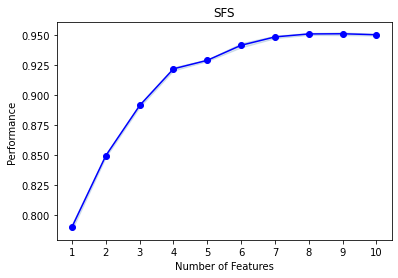

In [ ]:
plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('SFS')
plt.show()

Text(0.5, 1.0, 'SBS')

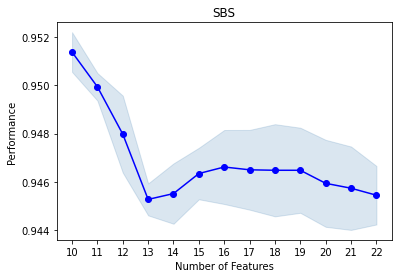

In [ ]:
plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('SBS')

Text(0.5, 1.0, 'SFFS')

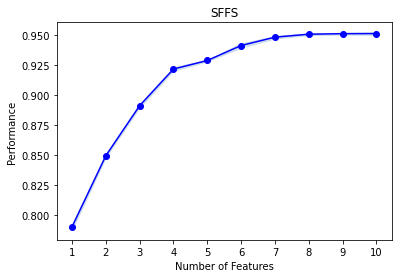

In [ ]:
plot_sfs(sffs.get_metric_dict(), kind='std_dev')
plt.title('SFFS')

Text(0.5, 1.0, 'SBFS')

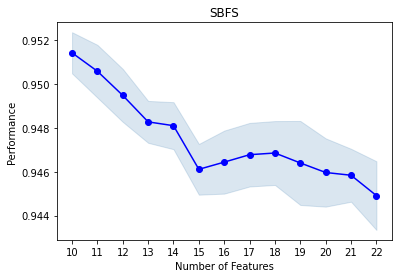

In [ ]:
plot_sfs(sbfs.get_metric_dict(), kind='std_dev')
plt.title('SBFS')

##Part 5

In [9]:
#function to get the next feature to push in Sf in sequential forward selection
def Push_next(X,y,Sf,similarity_measure,isGreaterBetter):
    #initializing scores
    best_score=0;
    best_ind=-1; #it denotes feature with maximum similarity score
    worst_score=0;
    worst_ind=-1; #it denotes feature with minimum similarity score

    #iterating over the reamining features to calculate the similarity score for each feature
    for i in range(X.shape[1]):

        #checking if Sf is empty or not. If empty, we cannot apply column stack operation to it
        #if not, we will create a temperory variable which consists of Sf and a new feature whose similarity score we have to find out
        if(Sf.shape==(0,)):
            temp_Sf=X[:,i]
        else:
            temp_Sf=np.c_[Sf,X[:,i]]


        #calculating similarity score
        score=similarity_measure(temp_Sf,y)

        #updating the feature indices with maximum and minimum scores
        if(score>best_score):
            best_score=score
            best_ind=i
        if(score<worst_score):
            worst_score=score
            worst_ind=i

    #checking if isGreaterBetter. This is because in case of accuracy, greater score is better and we should return the feature with best score while in case of distance measures, we should return feature with least similarity score (less the distance, more the accuracy)
    #assigning the next feature (next feat) we are going to add in the Sf
    if(isGreaterBetter):
        next_feat=best_ind
    else:
        next_feat=worst_ind

    
    #adding the next feat to the Sf
    if(Sf.shape==(0,)):
        Sf=X[:,next_feat]
    else:
        Sf=np.c_[Sf,X[:,next_feat]]

    #deleting the selected feature from the whole set of features.
    X=np.delete(X,next_feat,axis=1)
    return X,Sf

    

#function to pull next worst feature from the whole set of features in sequential backward selection algorithm
def Pull_next(X,y,Sb,similarity_measure,isGreaterBetter):
    #initializing scores
    best_score=0;
    best_ind=-1;#it denotes feature which gives us maximum similarity score on removing from the whole set of features
    worst_score=0;
    worst_ind=-1;#it denotes feature which gives us minimum similarity score on removing from the whole set of features

    #iterating over the reamining features to calculate the similarity score for each feature
    for i in range(X.shape[1]):

        #creating a local variable which is consisting of all the features except the feature for which we want to calculate the similarity score
        temp_x=np.delete(X,i,axis=1)

        #calculating the similarity score
        score=similarity_measure(temp_x,y)

        #updating features with maximum and minimum similarity score
        if(score>best_score):
            best_score=score
            best_ind=i
        if(score<worst_score):
            worst_score=score
            worst_ind=i

    
    #similar thing we did in the push_next function. 
    if(isGreaterBetter):
        next_feat=best_ind
    else:
        next_feat=worst_ind

    #updating the Sb set. Adding the removed feature to it
    if(Sb.shape==(0,)):
        Sb=X[:,next_feat]
    else:
        Sb=np.c_[Sb,X[:,next_feat]]

    #Deleting the rejected feature from the whole set of features
    X=np.delete(X,next_feat,axis=1)

    #returning the updated sets
    return X,Sb
            

def Bi_directional_Feature_Set_Generation(X,y,similarity_measure,k_features,isGreaterBetter=1):
    total_features=X.shape[1]
    #initializing the Xf (full set of features for forward selection), Sf (selected features set for forward selection, Xb (full set of features for backward selection) and Sb (removed feature in backwward selection))
    Xf=X.copy()
    Xb=X.copy()
    Sf=np.array([])
    Sb=np.array([])
    
    #no of features stored or removed from the full set of features
    n_features=0

    #this loop will run till either Sf contains k_features or Xb contains k_features
    while(n_features<k_features and (total_features-n_features)>k_features):
        Xf,Sf=Push_next(Xf,y,Sf,similarity_measure,isGreaterBetter) #Pushing next best feature to Sf and removing it from Xf
        Xb,Sb=Push_next(Xb,y,Sb,similarity_measure,isGreaterBetter) #Pulling next worst feature from Xb and pushing it to Sb
        
        n_features+=1
        print('no_of_iteration: ',n_features)
    print(n_features,k_features)

    #if the while loop break because no of features in Sf is equal to k_features, then return Sf. Else, Xb
    if(n_features==k_features):
        return Sf
    else:
        return Xb





    




In [10]:
def DTC_similarity_measure(X,y):
    DTC_clf=DecisionTreeClassifier()
    if X.ndim==1:
        X=X.reshape(-1,1)
    scores=CVS(DTC_clf,X,y,cv=5)
    return scores.mean()


def SVM_similarity_measure(X,y):
    
    SVM_clf=SVC()
    if X.ndim==1:
        X=X.reshape(-1,1)
    X_train,X_test,y_train,y_test=tts(X,y,train_size=0.1)
    SVM_clf.fit(X_train,y_train)
    return SVM_clf.score(X_test,y_test)

In [11]:

X_red=Bi_directional_Feature_Set_Generation(X.to_numpy(),y.to_numpy(),DTC_similarity_measure,10)


no_of_iteration:  1
no_of_iteration:  2
no_of_iteration:  3
no_of_iteration:  4
no_of_iteration:  5
no_of_iteration:  6
no_of_iteration:  7
no_of_iteration:  8
no_of_iteration:  9
no_of_iteration:  10
10 10


In [12]:
pd.DataFrame(X_red,columns=np.arange(X_red.shape[1]))

,0,1,2,3,4,5,6,7,8,9
0,3.0,1.0,3.0,1.0,4.0,0.0,2.0,5.0,5.0,5.0
1,3.0,0.0,3.0,3.0,3.0,1.0,0.0,4.0,1.0,1.0
2,5.0,0.0,2.0,2.0,4.0,0.0,0.0,4.0,5.0,5.0
3,2.0,0.0,2.0,5.0,3.0,0.0,0.0,4.0,2.0,2.0
4,5.0,0.0,3.0,3.0,4.0,0.0,0.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
103589,2.0,0.0,2.0,3.0,4.0,1.0,1.0,3.0,2.0,2.0
103590,4.0,0.0,4.0,4.0,5.0,0.0,0.0,5.0,5.0,5.0
103591,1.0,0.0,1.0,3.0,4.0,1.0,0.0,5.0,5.0,4.0
103592,1.0,0.0,1.0,5.0,1.0,1.0,1.0,4.0,1.0,1.0


In [13]:
def find_index(arr,X):
    for i in range(arr.shape[1]):
        if((arr[:,i]==X).all()):
            return i
    return -1

def selected_features_index(arr,X):
    selected_features=[]
    for i in range(X.shape[1]):
        selected_features.append(find_index(arr,X[:,i]))
    selected_features.sort()
    return selected_features

In [14]:
selected_features=selected_features_index(X.to_numpy(),X_red)
print("selected features in bidirectional feature selection through Decision tree classifier accuracy measure are: ",selected_features)

selected features in bidirectional feature selection through Decision tree classifier accuracy measure are:  [1, 3, 4, 6, 9, 11, 12, 13, 16, 18]


In [15]:
X_red_SVM=Bi_directional_Feature_Set_Generation(X.to_numpy(),y.to_numpy(),SVM_similarity_measure,10)
selected_features_SVM=selected_features_index(X.to_numpy(),X_red_SVM)



print("selected features in bidirectional feature selection through SVM classifier accuracy measure are: ",selected_features_SVM)

no_of_iteration:  1
no_of_iteration:  2
no_of_iteration:  3
no_of_iteration:  4
no_of_iteration:  5
no_of_iteration:  6
no_of_iteration:  7
no_of_iteration:  8
no_of_iteration:  9
no_of_iteration:  10
10 10
selected features in bidirectional feature selection through SVM classifier accuracy measure are:  [1, 3, 6, 8, 9, 11, 13, 14, 16, 18]


In [16]:
def Euclidian_distance(x,y):

    temp=x-y
    temp=temp**2
    temp=temp.sum()
    
    temp=np.sqrt(temp)
    return temp

Euclidian_scorer=make_scorer(Euclidian_distance,greater_is_better=False)
def Euclidian_similarity_measure(X,y):
    clf=DecisionTreeClassifier()
    if X.ndim==1:
        X=X.reshape(-1,1)

    scores=CVS(clf,X,y,cv=5,scoring=Euclidian_scorer)
    return scores.mean()

X_red_Euclidian=Bi_directional_Feature_Set_Generation(X.to_numpy(),y.to_numpy(),Euclidian_similarity_measure,10)
selected_features_Euclidian=selected_features_index(X.to_numpy(),X_red_Euclidian)



print("selected features in bidirectional feature selection through Decision tree classifier and Euclidian Distance measure are: ",selected_features_Euclidian)




no_of_iteration:  1
no_of_iteration:  2
no_of_iteration:  3
no_of_iteration:  4
no_of_iteration:  5
no_of_iteration:  6
no_of_iteration:  7
no_of_iteration:  8
no_of_iteration:  9
no_of_iteration:  10
10 10
selected features in bidirectional feature selection through Decision tree classifier and Euclidian Distance measure are:  [12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [17]:
print(Euclidian_scorer(DecisionTreeClassifier().fit(X[:1000],y[:1000]),X,y))
print(Euclidian_distance(DecisionTreeClassifier().fit(X[:1000],y[:1000]).predict(X),y))

-109.50342460398214
109.5764573254675


In [18]:
def City_block_distance(x,y):
    temp=x-y
    temp=np.abs(temp)
    temp=temp.sum()
    return temp

City_block_scorer=make_scorer(City_block_distance,greater_is_better=False)
def City_block_similarity_metric(X,y):
    clf=DecisionTreeClassifier()
    if X.ndim==1:
        X=X.reshape(-1,1)
    scores=CVS(clf,X,y,cv=5,scoring=City_block_scorer)
    return scores.mean() 

X_red_City_block=Bi_directional_Feature_Set_Generation(X.to_numpy(),y.to_numpy(),City_block_similarity_metric,10)
selected_features_City_block=selected_features_index(X.to_numpy(),X_red_City_block)

print("selected features in bidirectional feature selection through Decision tree classifier and City block Distance measure are: ",selected_features_City_block)

no_of_iteration:  1
no_of_iteration:  2
no_of_iteration:  3
no_of_iteration:  4
no_of_iteration:  5
no_of_iteration:  6
no_of_iteration:  7
no_of_iteration:  8
no_of_iteration:  9
no_of_iteration:  10
10 10
selected features in bidirectional feature selection through Decision tree classifier and City block Distance measure are:  [12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [19]:
def Angular_distance(x,y):
    
    dot_product = np.sum(x * y)
    norm1 = np.linalg.norm(x)
    norm2 = np.linalg.norm(y)
    angular_distance = dot_product / (norm1 * norm2)
    
    return angular_distance

Angular_scorer=make_scorer(Angular_distance,greater_is_better=False)
def Angular_similarity_metric(X,y):
    clf=DecisionTreeClassifier()
    if X.ndim==1:
        X=X.reshape(-1,1)
    scores=CVS(clf,X,y,cv=5,scoring=Angular_scorer)
    return scores.mean() 

X_red_Angular=Bi_directional_Feature_Set_Generation(X.to_numpy(),y.to_numpy(),Angular_similarity_metric,10)
selected_features_Angular=selected_features_index(X.to_numpy(),X_red_Angular)

print("selected features in bidirectional feature selection through Decision tree classifier and Euclidian Distance measure are: ",selected_features_Angular)

<ipython-input-19-4eabcad813b5>:6: RuntimeWarning: invalid value encountered in true_divide
  angular_distance = dot_product / (norm1 * norm2)
<ipython-input-19-4eabcad813b5>:6: RuntimeWarning: invalid value encountered in true_divide
  angular_distance = dot_product / (norm1 * norm2)
<ipython-input-19-4eabcad813b5>:6: RuntimeWarning: invalid value encountered in true_divide
  angular_distance = dot_product / (norm1 * norm2)
<ipython-input-19-4eabcad813b5>:6: RuntimeWarning: invalid value encountered in true_divide
  angular_distance = dot_product / (norm1 * norm2)
<ipython-input-19-4eabcad813b5>:6: RuntimeWarning: invalid value encountered in true_divide
  angular_distance = dot_product / (norm1 * norm2)
<ipython-input-19-4eabcad813b5>:6: RuntimeWarning: invalid value encountered in true_divide
  angular_distance = dot_product / (norm1 * norm2)
<ipython-input-19-4eabcad813b5>:6: RuntimeWarning: invalid value encountered in true_divide
  angular_distance = dot_product / (norm1 * norm2)

no_of_iteration:  1
no_of_iteration:  2
no_of_iteration:  3
no_of_iteration:  4
no_of_iteration:  5
no_of_iteration:  6
no_of_iteration:  7
no_of_iteration:  8
no_of_iteration:  9
no_of_iteration:  10
10 10
selected features in bidirectional feature selection through Decision tree classifier and Euclidian Distance measure are:  [12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [20]:
# X_red_SVM=Bi_directional_Feature_Set_Generation(X.to_numpy(),y.to_numpy(),SVM_similarity_measure,10)

In [21]:
Angular_distance(np.array([1,1,1,1]),np.array([1,1,1,1]))

1.0

In [22]:

def info_gain_similarity_measure(X,y):
    if(X.ndim==1):
        X=X.reshape(-1,1)
    return mutual_info_classif(X,y).sum()

X_red_info_gain=Bi_directional_Feature_Set_Generation(X.to_numpy(),y.to_numpy(),info_gain_similarity_measure,10)
selected_features_info_gain=selected_features_index(X.to_numpy(),X_red_info_gain)

print("selected features in bidirectional feature selection through Information gain are: ",selected_features_info_gain)

no_of_iteration:  1
no_of_iteration:  2
no_of_iteration:  3
no_of_iteration:  4
no_of_iteration:  5
no_of_iteration:  6
no_of_iteration:  7
no_of_iteration:  8
no_of_iteration:  9
no_of_iteration:  10
10 10
selected features in bidirectional feature selection through Information gain are:  [3, 4, 5, 6, 11, 12, 13, 14, 15, 19]


In [23]:
for X,similarity_measure in zip([X_red,X_red_SVM,X_red_info_gain,X_red_Euclidian,X_red_City_block,X_red_Angular],['Decision tree accuracy measure','SVM classifier accuracy measure','Information gain','Euclidian distance measure','City block measure','Angular distance measure']):
    clf=DecisionTreeClassifier()
    scores=CVS(clf,X,y,cv=5)
    print(similarity_measure,':',scores.mean())


Decision tree accuracy measure : 0.9505859472161153
SVM classifier accuracy measure : 0.9449099267844776
Information gain : 0.9187694440096225
Euclidian distance measure : 0.7586154369771518
City block measure : 0.7589822477176698
Angular distance measure : 0.7586250843616154


#Problem 2

##Part 1

In [ ]:
mean=np.zeros(3,dtype=int)
cov=np.array([[0.6006771,0.14889879,0.244939],[0.14889879,0.58982531,0.24154981],[0.244939,0.24154981,0.48778655]])
# mean
X=np.random.multivariate_normal(mean,cov,size=1000)
X

array([[-0.29122188, -1.1513831 ,  0.07274635],
       [ 0.85287957,  0.52273377,  0.55446004],
       [-0.74996331, -0.96682165, -0.13096122],
       ...,
       [ 0.62287705,  0.52115058, -0.37776977],
       [-0.31855451, -1.54733063, -0.14524945],
       [-1.13525918, -1.5366379 , -0.80392794]])

In [ ]:
r_6=np.sqrt(6)
v=np.array([[1/r_6],[1/r_6],[(-2)/r_6]])
y=np.zeros(X.shape[0],dtype=int)
for i in range(X.shape[0]):
    if(np.dot(X[i,:],v)<=0):
        y[i]=1
y

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
fig=exp.scatter_3d(X,x=X[:,0],y=X[:,1],z=X[:,2],color=y)
fig.show()

##Part 2

In [ ]:
pca=PCA(n_components=3)
pca.fit(X)
X_red=pca.transform(X)
X_red

array([[ 0.83716802,  0.57641654, -0.67525664],
       [-1.07235298,  0.22448518,  0.08207908],
       [ 1.11626276,  0.12737099, -0.59483517],
       ...,
       [-0.40579921,  0.10341095,  0.76252246],
       [ 1.20517609,  0.8402182 , -0.67999175],
       [ 2.05348754,  0.27411436, -0.43326859]])

##Part 3

In [ ]:
def plot_decision_boundary(clf,X,Y,classes,plot_colors):
    # print(n)
    # new_clf_RFC=  BaggingClassifier(base_estimator=SVC(),n_estimators=n ).fit(X_train,Y_train)
    # print(new_clf_RFC.score(X_test,Y_test))
    
    n_classes = len(classes)
    
    plot_step = 0.04
    


    # X=self.transform(X)
        
        

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel("X1")
    plt.ylabel("X2")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == classes[i])
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=16)


    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")


    plt.show()

for [0, 1]
accuracy:  0.5033333333333333


<ipython-input-32-475110731f53>:32: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



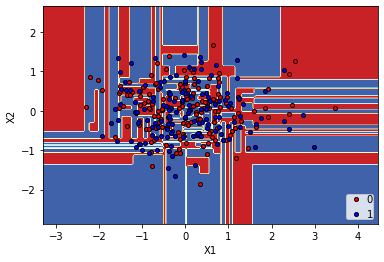

for [1, 2]
accuracy:  0.9766666666666667


<ipython-input-32-475110731f53>:32: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



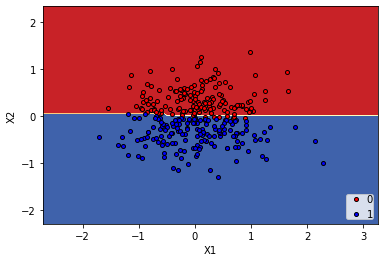

for [0, 2]
accuracy:  0.9733333333333334


<ipython-input-32-475110731f53>:32: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



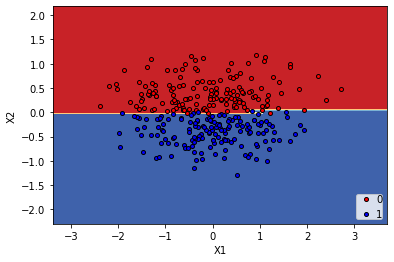

In [ ]:
dtc_clf=DecisionTreeClassifier()
for features in [[0,1],[1,2],[0,2]]:
    new_X=X_red[:,features]
    X_train,X_test,y_train,y_test=tts(new_X,y,test_size=0.3)
    dtc_clf.fit(X_train,y_train)
    accuracy=dtc_clf.score(X_test,y_test)
    print(f'for {features}')
    print('accuracy: ',accuracy)
    plot_decision_boundary(dtc_clf,X_test,y_test,np.array([0,1]),'rb')




##Part 4

In [ ]:
pca=PCA(n_components=2)
pca.fit(X)
X_red_2=pca.transform(X)
X_red_2

array([[ 0.83716802,  0.57641654],
       [-1.07235298,  0.22448518],
       [ 1.11626276,  0.12737099],
       ...,
       [-0.40579921,  0.10341095],
       [ 1.20517609,  0.8402182 ],
       [ 2.05348754,  0.27411436]])

In [ ]:
for features in [[0,1],[1,2],[0,2]]:
    print(features)
    temp = X_red[:,features] - X_red_2
    distance = np.sqrt(np.sum(np.square(temp)))
    print(distance,'\n')

[0, 1]
1.7950820155069126e-14 

[1, 2]
44.892896031683456 

[0, 2]
25.582488570651158 



Here we can see that the euclidian distance between the matrices is least when first two features are selected. So, we can say that when we will apply the pca for 2 components we will get first two features of the dataset that we got from pca for 3 components

0.47


<ipython-input-32-475110731f53>:32: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



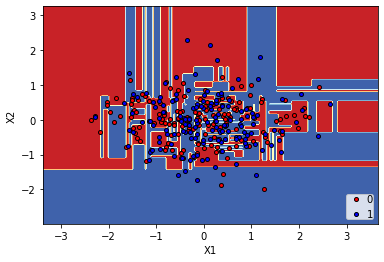

In [ ]:
dtc_clf=DecisionTreeClassifier()
X_train,X_test,y_train,y_test=tts(X_red_2,y,test_size=0.3)
dtc_clf.fit(X_train,y_train)
print(dtc_clf.score(X_test,y_test))
plot_decision_boundary(dtc_clf,X_test,y_test,[0,1],'rb')

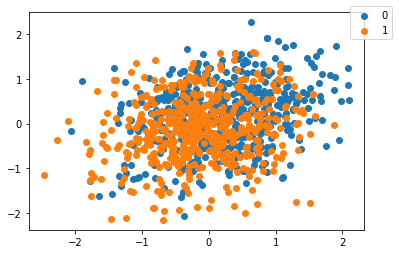

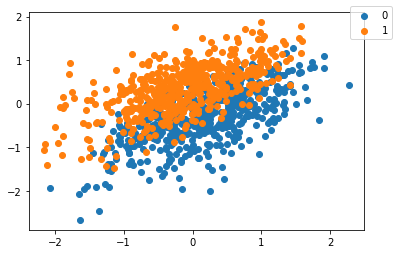

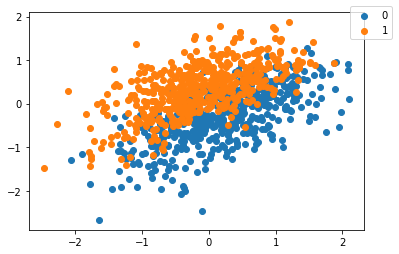

In [ ]:
for features in [[0,1],[1,2],[0,2]]:
    plot_x=X[:,features[0]]
    plot_y=X[:,features[1]]
    for class_no in np.unique(y):
        idx=np.where(y==class_no)[0]
        plt.scatter(plot_x[idx],plot_y[idx],label=class_no)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()



As we can see that first two features are not seperating data effectively in comparision to other two pairs. Therefore, we are getting much less accuracy when we consider first two features to train the model

In [ ]:
np.cov(X_red,rowvar=False)

array([[ 9.49061546e-01, -2.17821534e-16,  9.51302211e-17],
       [-2.17821534e-16,  4.13209118e-01, -3.55626995e-17],
       [ 9.51302211e-17, -3.55626995e-17,  2.41909723e-01]])

From here we can see that the standard deviation is higher for first two features therefore pca is giving more weightage to these two features. But this fact is independent of whether the two classes are seperable or not